# IT вакансии в Казахстане

Цель анализа рынка IT вакансии в Казахстана - получить структурированное представление о том, какие специалисты востребованы, как формируется уровень заработной платы, и каких городах перспективнее строить карьеру.

## Цели проекта

1. Изучить структуру и характеристики вакансии в IT-сфере в Казахстане за 2023 год (июнь-июль).
2. Определить распределение вакансий по:
   - Должностям
   - Городам
   - Зарплате
3. Проанализировать уровень заработной платы в зависимости от должности, опыта и других факторов.
4. Исследовать существующие тенденции и закономерности.
5. Сформулировать выводы, которые могут помочь:
   - Выбрать направление развития соискателям
   - Понимать рынок зарплат работадателям

## Установка библиотек

In [ ]:
!pip install pandas matplotlib seaborn

## Импортирование библиотек

Подключение основных библиотек для анализа данных, визуализации и обработки информации.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import re

## Загрузка данных

Данные получены из публичного набора данных, представленного Astana Hub загруженный на GitHub.<br>
Оригинальный датасет доступен по ссылке: https://github.com/eidarulu/IT-jobs-in-Kazakhstan.

Загружаем датасет с информацией об IT-вакансиях в Казахстане за июнь-июль 2023 года.

In [3]:
df = pd.read_csv('../data/IT_jobs_in_Kazakhstan.csv')
df

,Unnamed: 0,title,salary,city,job,publish_date,requirements,responsibilities,schedule,experience,employment,url,Job
0,0,Big Data аналитик (Junior),NaN,Алматы,"Beeline, ТМ",19-07-2023,"Отличные знания высшей математики, теории веро...",Проведение аналитических работ в своем направл...,NaN,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83688314,Data Analyst
1,1,Data аналитик,NaN,Алматы,"Центр развития города Алматы, АО",29-06-2023,Обязательное высшее техническое образование. О...,Автоматизация и разработка алгоритмов для сбор...,NaN,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/82757292,Data Analyst
2,2,Data Analyst,NaN,Алматы,Казахстанско - Британский технический университет,20-07-2023,Высшее образование в области компьютерных наук...,Проектирование и разработка автоматизированных...,NaN,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/83728215,Data Analyst
3,3,Data Engineer,NaN,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...,13-07-2023,Уверенное владение SQL и PL/SQL. Чтение и пони...,Разработка и поддержка витрин данных в интерес...,NaN,Нет опыта,Полная занятость,https://hh.ru/vacancy/83364726,Data Analyst
4,4,Game Data Analyst,NaN,Астана,G5EN KAZ,20-07-2023,Knowledge of SQL basics. Work experience as an...,Interact directly with the project producer an...,NaN,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83781624,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,1749,QA Intern - Functional testing,NaN,Алматы,a1qa (ООО ITRANSITION),22-07-2023,Comprehensive understanding of the <highlightt...,Conducting rigorous functional <highlighttext>...,NaN,Нет опыта,Стажировка,https://hh.ru/vacancy/77063417,Test Engineer
1750,1750,Инженер по тестированию бурового инструмента,NaN,Караганда,Sandvik Mining and Construction Kazakhstan LTD,17-07-2023,Высшее техническое образование по специальност...,"Проведение испытаний бурового инструмента, офо...",NaN,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/80926451,Test Engineer
1751,1751,Test Engineer (направление сгущение и фильтрации),NaN,Караганда,Метсо Оутотек Казахстан,23-07-2023,Техническое образование. Опыт работы в проведе...,Организация и проведение лабораторных испытани...,NaN,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/82471597,Test Engineer
1752,1752,Инженер по автоматизации тестирования iOS,NaN,Алматы,Иви,11-07-2023,Опыт работы с Appium или XCUITest. Опыт работы...,"Код хранится в Gitlab, CI\CD — Jenkins и Gitla...",NaN,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83261114,Test Engineer


## Первичный обзор данных

Общая информация о датасете включая количество столбцов, записей, не нулевых значений, типов данных и занимающую память.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1754 non-null   int64  
 1   title             1754 non-null   object 
 2   salary            768 non-null    object 
 3   city              1754 non-null   object 
 4   job               1754 non-null   object 
 5   publish_date      1754 non-null   object 
 6   requirements      1715 non-null   object 
 7   responsibilities  1687 non-null   object 
 8   schedule          0 non-null      float64
 9   experience        1754 non-null   object 
 10  employment        1754 non-null   object 
 11  url               1754 non-null   object 
 12  Job               1754 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 178.3+ KB


---

Полная описательная статистика по всем типам переменных датасета для оценки распределениня и качества данных.

In [5]:
df.describe(include='all')

,Unnamed: 0,title,salary,city,job,publish_date,requirements,responsibilities,schedule,experience,employment,url,Job
count,1754.000000,1754,768,1754,1754,1754,1715,1687,0.0,1754,1754,1754,1754
unique,NaN,957,234,29,919,31,1338,1293,NaN,4,4,1508,14
top,NaN,HR менеджер,200000 KZT,Алматы,Тинькофф,24-07-2023,Приветствуется опыт работы в подборе персонала...,Массовый подбор линейного персонала (водители ...,NaN,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83736572,Programmer
freq,NaN,99,29,1050,21,158,12,12,NaN,848,1652,3,700
mean,876.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,506.480503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,438.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,876.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1314.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество записей, количество столбцов.

In [6]:
df.shape

(1754, 13)

---

Тип данных каждого столбца.

In [7]:
df.dtypes

Unnamed: 0            int64
title                object
salary               object
city                 object
job                  object
publish_date         object
requirements         object
responsibilities     object
schedule            float64
experience           object
employment           object
url                  object
Job                  object
dtype: object

---

Количество не нулевых значений в каждом столбце.

In [8]:
df.isna().sum().sort_values(ascending=False)

schedule            1754
salary               986
responsibilities      67
requirements          39
Unnamed: 0             0
job                    0
city                   0
title                  0
publish_date           0
experience             0
employment             0
url                    0
Job                    0
dtype: int64

---

Общее количество повторяющихся записей.

In [9]:
df.duplicated().sum()

np.int64(0)

## Очистка данных

В датасете присутствуют колонки 'Unnamed: 0' и 'schedule' которые не несут полезной информации.<br>
- 'Unnamed: 0' - это технический индекс, появившийся при сохранени CSV.
- 'schedule' - полностью пустая колонка.<br>

Чтобы упростить датасет, удаляем эти столбцы.

In [10]:
df.drop(columns=['Unnamed: 0', 'schedule'], inplace=True)

df.columns.tolist()

['title',
 'salary',
 'city',
 'job',
 'publish_date',
 'requirements',
 'responsibilities',
 'experience',
 'employment',
 'url',
 'Job']

---
Переименование столбцов 'job' на 'company' и 'Job' на 'job' для устранения смысловых ошибок и избежании одинаковых названии.

In [11]:
df.rename(columns={'job': 'company', 'Job': 'job'}, inplace=True)

df[['company', 'job']]

,company,job
0,"Beeline, ТМ",Data Analyst
1,"Центр развития города Алматы, АО",Data Analyst
2,Казахстанско - Британский технический университет,Data Analyst
3,Мобайл Телеком-Сервис (Объединенная Компания T...,Data Analyst
4,G5EN KAZ,Data Analyst
...,...,...
1749,a1qa (ООО ITRANSITION),Test Engineer
1750,Sandvik Mining and Construction Kazakhstan LTD,Test Engineer
1751,Метсо Оутотек Казахстан,Test Engineer
1752,Иви,Test Engineer


---
Анализ будет проводится только для вакансии зарплаты которых указаны в местной валюте для избежании корреляции курса других валют.<br>

Оставляем все записи включая те где зарплата не указана кроме тех где зарплата указано в долларах, рублях или евро.

In [12]:
pattern = r'(?:USD|RUR|EUR)'
to_keep = ~df['salary'].str.contains(pattern, case=False, na=False)

df = df[to_keep]
df = df.reset_index(drop=True)

df.shape

(1649, 11)

---
Стандартизация пропущенных значения в столбцах, чтобы избежать их автоматического удаления или некорректной обработки при последующем анализе.

In [13]:
fill = {
    'salary': 'Договорная',
    'responsibilities': 'Не указано',
    'requirements': 'Не указано'
}
df.fillna(fill, inplace=True)

df.head()

,title,salary,city,company,publish_date,requirements,responsibilities,experience,employment,url,job
0,Big Data аналитик (Junior),Договорная,Алматы,"Beeline, ТМ",19-07-2023,"Отличные знания высшей математики, теории веро...",Проведение аналитических работ в своем направл...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83688314,Data Analyst
1,Data аналитик,Договорная,Алматы,"Центр развития города Алматы, АО",29-06-2023,Обязательное высшее техническое образование. О...,Автоматизация и разработка алгоритмов для сбор...,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/82757292,Data Analyst
2,Data Analyst,Договорная,Алматы,Казахстанско - Британский технический университет,20-07-2023,Высшее образование в области компьютерных наук...,Проектирование и разработка автоматизированных...,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/83728215,Data Analyst
3,Data Engineer,Договорная,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...,13-07-2023,Уверенное владение SQL и PL/SQL. Чтение и пони...,Разработка и поддержка витрин данных в интерес...,Нет опыта,Полная занятость,https://hh.ru/vacancy/83364726,Data Analyst
4,Game Data Analyst,Договорная,Астана,G5EN KAZ,20-07-2023,Knowledge of SQL basics. Work experience as an...,Interact directly with the project producer an...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83781624,Data Analyst


---
Преобразование столбца 'publish_date' в тип данных datetime для обеспечения корректной фильтрации и выполнения временной аналитики.

In [14]:
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)

df.dtypes

title                       object
salary                      object
city                        object
company                     object
publish_date        datetime64[ns]
requirements                object
responsibilities            object
experience                  object
employment                  object
url                         object
job                         object
dtype: object

---
Выведение общей информации о датасете после всех выполненных операций выше.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1649 non-null   object        
 1   salary            1649 non-null   object        
 2   city              1649 non-null   object        
 3   company           1649 non-null   object        
 4   publish_date      1649 non-null   datetime64[ns]
 5   requirements      1649 non-null   object        
 6   responsibilities  1649 non-null   object        
 7   experience        1649 non-null   object        
 8   employment        1649 non-null   object        
 9   url               1649 non-null   object        
 10  job               1649 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 141.8+ KB


## Создание новых признаков

Столбец 'experience' содержит значения в текстовом формате:<br>
- "Нет опыта"
- "От 1 до 3 лет"
- "Более 6 лет"

Для далнейшего анализа потребуется преобразовать эти данные в числовой формат.

Создается функция 'experience_interval()' которая:
- Преобразует текст в один формат;
- Извлекает числа из строки;
- Обрабатывает вышеперечисленные варианты значений на (0, 0), (a b) и (a, 100) соответсвенно, где 100 - условный верхний предел а 'a' и 'b' - числа, требуемый опыт от и до.

После создаются два новых столбца:
- 'exp_min' - минимальный требуемый опыт.
- 'exp_max' - макисмальный требуемый опыт.

In [16]:
def experience_interval(text):
    s = text.lower().strip()
    
    if s == 'нет опыта':
        return (0, 0)

    nums = re.findall(r'\d+', s)
    nums = [int(n) for n in nums]

    if len(nums) == 0:
        return (0, 0)

    if "от" in s and "до" in s and len(nums) >= 2:
        return (nums[0], nums[1])

    if "более" in s and len(nums) >= 1:
        return (nums[0], 100)

df[['exp_min', 'exp_max']] = df['experience'].apply(lambda x: pd.Series(experience_interval(x)))

In [17]:
df[['exp_min', 'exp_max']]

,exp_min,exp_max
0,1,3
1,3,6
2,3,6
3,0,0
4,1,3
...,...,...
1644,0,0
1645,3,6
1646,3,6
1647,1,3


---

Столбец 'salary' содержит данные о зарплате в текстовом виде:
- '400000 - 600000 KZT' (диапазон)
- '300000 KZT' (фиксированная)
- 'Договорная' (нет указанной суммы)

Для анализа необходимо преобразовать эти значения в единый числовой формат.

Создается функция 'salary_mean()':
- Если указано два число (диапазон), возвращается **среднее арифметическое**
- Если указана одна сумма - она же и возвращается.
- Если указано 'Договорная' - возвращается NaN.

После этого:
- Создается новый столбец;
- все значения преобразуются в числовой формат 'Int64'
- Корректно обрабатываются пропуски.

In [18]:
def salary_mean(text):
    if text == 'Договорная':
        return
        
    s = text.strip().split()
    
    if len(s) > 2:
        return str((int(s[0]) + int(s[2])) // 2)
        
    return s[0]

df['salary_mean'] = df['salary'].apply(lambda x: pd.Series(salary_mean(x)))
numeric_salary = pd.to_numeric(df['salary_mean'], errors='coerce')
df['salary_mean'] = numeric_salary.astype('Int64')

df[100:110]

,title,salary,city,company,publish_date,requirements,responsibilities,experience,employment,url,job,exp_min,exp_max,salary_mean
100,Frontend-разработчик,400000 - 600000 KZT,Алматы,Фабрика проектов,2023-07-12,Навыки: JS. Vue.js. Nuxt.js. Клиенты из разных...,Разработка новых проектов. Поддержка запущенны...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83351608,Developer,1,3,500000
101,Middle IOS-разработчик,Договорная,Алматы,Khan Group,2023-07-18,"Уверенное знание Swift, алгоритмов и структур ...",Верстка UI под iOS (Autolayout). Moya для сете...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83588263,Developer,1,3,<NA>
102,"Программист .net (C#, ASP.NET Core, MSSQL, Jav...",Договорная,Астана,findexIT,2023-07-19,Знание .NET Framework (C#). Знание принципов о...,"Поддержка ранее разработанного ПО (доработка, ...",От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83657890,Developer,1,3,<NA>
103,Стажер-программист в отдел технической поддержки,100000 KZT,Алматы,Prime Source,2023-07-05,Базовые навыки программирования. Знание алгори...,Закрытие заявок по технической поддержке (инци...,Нет опыта,Стажировка,https://hh.ru/vacancy/83003932,Developer,0,0,100000
104,Инженер-программист,10000 - 200000 KZT,Костанай,TDK,2023-07-20,Навыки в программировании и алгоритмике. Знани...,Настройка звуков для игры. Сборка и подключени...,От 1 года до 3 лет,Проектная работа,https://hh.ru/vacancy/83760400,Developer,1,3,105000
105,Стажер-программист 1С,80000 - 300000 KZT,Атырау,PROFF TIME,2023-07-21,У тебя законченное высшее или средне-специальн...,Бесплатное обучение работе в программе 1С от а...,Нет опыта,Стажировка,https://hh.ru/vacancy/83794262,Developer,0,0,190000
106,Java-разработчик,Договорная,Алматы,АО «Bank Freedom Finance Kazakhstan»,2023-07-17,"Java SE - обязательно наличие опыта*. SOAP, Re...",Автоматизация бизнес-процессов. Разработка мик...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83523968,Developer,1,3,<NA>
107,Middle frontend разработчик,Договорная,Астана,SAM Project,2023-07-18,1. HTML. 4. React/Redux Thunk/React Query/ Str...,1. проектирование архитектуры модулей/веб-прил...,От 3 до 6 лет,Полная занятость,https://hh.ru/vacancy/83588294,Developer,3,6,<NA>
108,Программист-разработчик,Договорная,Шымкент,HITECH INC,2023-07-08,"уверенное владение php 7, php 8. - отличное зн...",Не указано,Более 6 лет,Полная занятость,https://hh.ru/vacancy/83175492,Developer,6,100,<NA>
109,Android Developer,Договорная,Алматы,Tredo,2023-07-13,высокая степень вовлеченности. - управление зн...,правильное обеспечение качества продукта: рабо...,От 1 года до 3 лет,Полная занятость,https://hh.ru/vacancy/83396542,Developer,1,3,<NA>


---

Расставление стобцов по удобному для обзора расположений. 

In [19]:
df = df[['title', 'salary', 'salary_mean', 'city', 'company', 'publish_date', 'requirements',
       'responsibilities', 'experience', 'exp_min',
       'exp_max', 'employment', 'job', 'url']]

df.head()

,title,salary,salary_mean,city,company,publish_date,requirements,responsibilities,experience,exp_min,exp_max,employment,job,url
0,Big Data аналитик (Junior),Договорная,<NA>,Алматы,"Beeline, ТМ",2023-07-19,"Отличные знания высшей математики, теории веро...",Проведение аналитических работ в своем направл...,От 1 года до 3 лет,1,3,Полная занятость,Data Analyst,https://hh.ru/vacancy/83688314
1,Data аналитик,Договорная,<NA>,Алматы,"Центр развития города Алматы, АО",2023-06-29,Обязательное высшее техническое образование. О...,Автоматизация и разработка алгоритмов для сбор...,От 3 до 6 лет,3,6,Полная занятость,Data Analyst,https://hh.ru/vacancy/82757292
2,Data Analyst,Договорная,<NA>,Алматы,Казахстанско - Британский технический университет,2023-07-20,Высшее образование в области компьютерных наук...,Проектирование и разработка автоматизированных...,От 3 до 6 лет,3,6,Полная занятость,Data Analyst,https://hh.ru/vacancy/83728215
3,Data Engineer,Договорная,<NA>,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...,2023-07-13,Уверенное владение SQL и PL/SQL. Чтение и пони...,Разработка и поддержка витрин данных в интерес...,Нет опыта,0,0,Полная занятость,Data Analyst,https://hh.ru/vacancy/83364726
4,Game Data Analyst,Договорная,<NA>,Астана,G5EN KAZ,2023-07-20,Knowledge of SQL basics. Work experience as an...,Interact directly with the project producer an...,От 1 года до 3 лет,1,3,Полная занятость,Data Analyst,https://hh.ru/vacancy/83781624


## Анализ данных

Установка приятного стиля для отображения графиков.

In [20]:
sns.set(style='darkgrid')

> В данном разделе анализируются вакансии, опубликованные в Казахстане в 2023 году в период с июня по июль.

**Цель:**<br>
Анализ распределения количество вакансий по месяцам июнь и июль на основе даты публикации в наборе данных для быстрой оценки в какой месяц было опубликовано больше всего предложений.

Text(0.5, 1.0, 'Количество вакансии по месяцам')

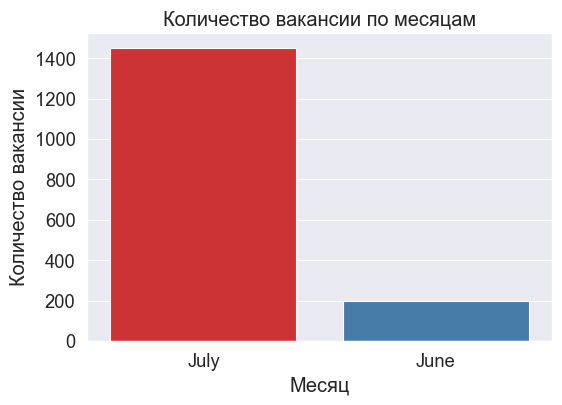

In [21]:
plt.figure(figsize=(6, 4))
sns.set_context("paper", font_scale=1.5)

month = df['publish_date'].dt.month_name().value_counts()
sns.barplot(x=month.index, y=month.values, palette='Set1', hue=month.index, legend=False)

plt.ylabel('Количество вакансии')
plt.xlabel('Месяц')
plt.title('Количество вакансии по месяцам')

**Результат:**<br>
Столбчатая диаграмма наглядно демонстрирует, что *Июль* иммеет значительно большее количество опубликованных вакансии по сравнению с *Июнем*.<br>

**Вывод:**<br>
Активность публикации вакансии в данном наборе данных была существенно выше в июле. Это может указывать на сезонный рост или на то, что большая часть данных была собрана именно в середине лето.

---

**Цель:**<br>
Определить *топ-10 городов* по количеству опубликованных вакансии в Казахстане используя горизонтальный столбчатый график, который четко покажет, какие города являются лидерами по IT-вакансии и более перспективными для трудоустройствия.

Text(0.5, 1.0, 'Топ 10 городов по количеству IT вакансии')

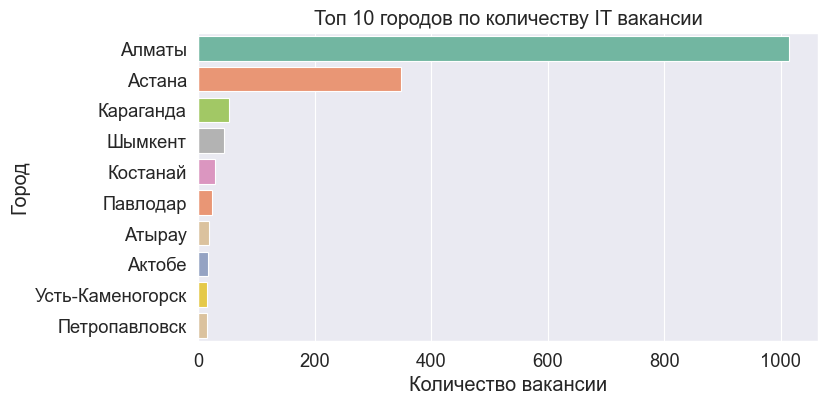

In [22]:
top_10_city = list(df['city'].value_counts().head(10).index)
plt.figure(figsize=(8, 4))
sns.set_context("paper", font_scale=1.5)

sns.countplot(y='city', data=df, order=top_10_city, palette='Set2', hue='city', legend=False)

plt.xlabel('Количество вакансии')
plt.ylabel('Город')
plt.title('Топ 10 городов по количеству IT вакансии')

**Результат:**<br>
Горизонтальная столбчатая диаграмма демонстрирует сильную концентрацию вакансии на двух крупнейших городах Казахстана:
1. **Алматы:** Явный лидер с более чем 1000 вакансий, что значительно превосходит все остальные города<br>
2. **Астана:** Занимает второе место не смотря на свой статус столицыс примерно 350 вакансиями.

<br>**Вывод:**<br>
Рынок IT-вакансии в РК сильно сосредоточен в **Алматы** и **Астане**, что отражает статус этих городов как крупнейших экономических и деловых центров страны. Разница между другими городами очень существенна.

---

**Цель:**<br>
Выявить *топ-10 самых востребованных IT-специальностей* используя горизонтальный столбчатый график, который покажет, какие IT-роли пользуются наибольшим спросом на рынке труда Казахстана и в какую сторону идет больше упор.

Text(0.5, 1.0, 'Топ 10 самых востребованных IT-специальностей')

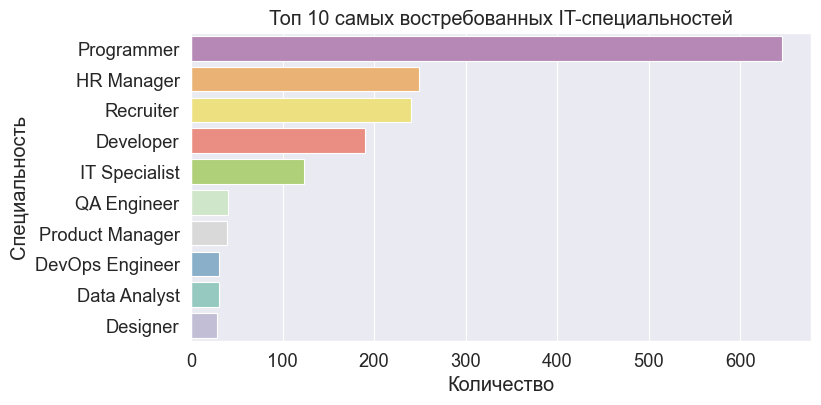

In [23]:
top_10_job = list(df['job'].value_counts().head(10).index)
plt.figure(figsize=(8, 4))
sns.set_context('paper', font_scale=1.5)

sns.countplot(y='job', order=top_10_job, palette='Set3', hue='job', legend=False, data=df)

plt.xlabel('Количество')
plt.ylabel('Специальность')
plt.title('Топ 10 самых востребованных IT-специальностей')

**Результат:**<br>
Горизонтальная столбчатая диаграмма демонстрирует существенный спрос на технические, и, что интересно, на HR-позиции:
1. **Программист**: Является абсолютным лидер, имея более 600 вакансий, подчеркивая фундаментальную потребность рынка в решениях определенных задач.
2. **HR Менеджер и Рекрутер**: Около 250 и 230 вакансии соответственно, говорит о том, что активный рост найма в IT-секторе требует большого количества специалистов по подбору и управлению персоналом.
3. **Разработчик**: Также находится в лидерах с 200 вакансиями, подтверждая высокий спрос на создание и поддержку ПО.
4. **IT Специалист**, **QA Инженер**, **Менеджер по Продукту**, **DevOps Инженер**, **Аналитик Данных**, **Дизайнер** замыкают десятку, демонстрируя стабильный, но меньший спрос.

<br>**Вывод:**<br>
Наибольший спрос существует у **Программистов** и специалистов по **Найму**, что является характерным признаком быстрорастущего IT-рынка.

---

Дальнейший анализ содержит большие числа что может плохо отразится на усвоения информации графиков. Поэтому создается функция форматирование чисел в один стандартный вид (в тысячах).
<br>

Будут использованы только те записи, где указана зарплата.

In [24]:
def to_thousands(x, pos):
    return f"{int(x/1000)}тыс."
    
def formatter():
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(to_thousands))

notna_mean_salary = df[df["salary_mean"].notna()]

---

**Цель:**<br>
Визуализировать распределение средних предлагаемых зарплат в различных городах Казахстана с использованием гистрограммы с двумерной плотностью, где более темные области указывают на самую высокую плотность вакансий с определенным уровнем зарплаты в конкретном городе. Это позволит оценить медианные и основные диапазоны зарплат по географии.

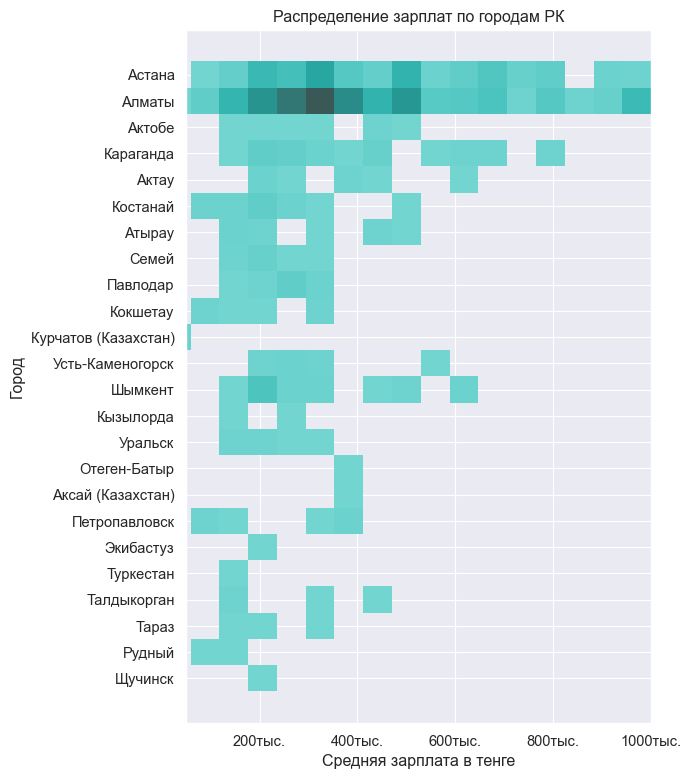

In [25]:
plt.figure(figsize=(6, 9))
sns.set_context('paper', font_scale=1.2)

sns.histplot(y='city', x='salary_mean', palette='viridis', hue=0, legend=False, data=notna_mean_salary)

plt.xlim(50000, df['salary_mean'].quantile(0.95))
plt.xlabel('Средняя зарплата в тенге')
plt.ylabel('Город')
plt.title('Распределение зарплат по городам РК')
formatter()

**Результат:**<br>
Гистрограмма показывает, что:
1. **Лидеры Алматы и Астана:**
   - Имеют самую высокую плотность вакансии.
   - Демонстрируют высокую концентрацию вакансий в диапазоне **200-400 тыс. тенге**, что соответсвует медианному уровню для IT-специалистов.
   - Наблюдается заметное количество вакансий в более высоких диапазонах, вплоть до **1000000 тенге**
3. **Региональные центры (Актобе, Караганда, Актау):** Плотность вакансий ниже, а основная концентрация зарплат смещена в сторону более низких значений (**150-350 тыс. тенге**), хотя есть и отдельные вакансии в диапазоне **400-600 тыс. тенге**
4. **Малые города (Уральск, Щучинск, Рудный):** Очень низкая плотность вакансий, и их зарплатный диапазон редко выходит за пределы **400-600 тыс. тенге**, что может быть связано с меньшим количеством высокооплачиваемых, высокоуровневых позиций.

<br>**Вывод:**<br>
Как и в случае с количеством вакансий, **Алматы и Астана** являются центрами как по объему, так и по широте зарплатных предложений, предлагая максимальный диапазон и разнобразие, включая наиболее высокооплачиваемые позиции. В остальных городах предложения более ограничены скорее в связи меньшего спроса и имеют более низкую медиану.

---

**Цель:**<br>
Визуализировать распределения средних предлагаемых зарплат по различным IT-специальностям с использованием гистограммы с двумерной плотностью. Это позволит сравнить медианные зарплаты и их разброс по различным IT-ролям, узнав какие специальности предлагают более стабильные и высокооплачиваемые зарплаты.

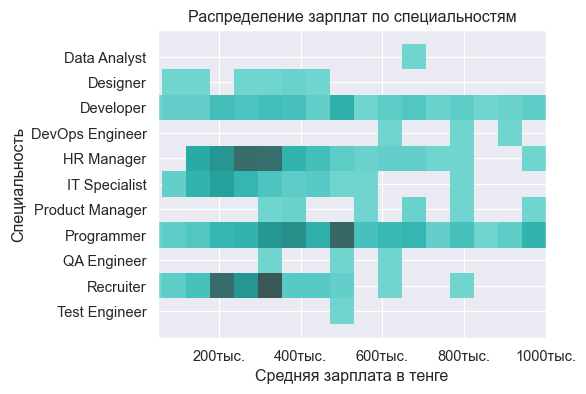

In [26]:
plt.figure(figsize=(5, 4))
sns.set_context('paper', font_scale=1.2)

sns.histplot(y='job', x='salary_mean', palette='viridis', hue=0, legend=False, data=notna_mean_salary)

plt.xlim(50000, df['salary_mean'].quantile(0.95))
plt.xlabel('Средняя зарплата в тенге')
plt.ylabel('Специальность')
plt.title('Распределение зарплат по специальностям')
formatter()

**Результат:**<br>
Гистограмма выявляет значительные различия в оплате труда между IT-ролями:
1. **Наиболее высокооплачиваемые роли:**
   - **DevOps Инженер** и **Менеджер по Продуктам** демонстрируют высокую концентрацию вакансий в диапазоне **400-600 тыс. тенге** и имеют заметное количество предложений, достигающих **1000000 тенге**.
   - **Аналитик Данных** также имеет значительное количество предложений, достигающих **1000000 тенге**
2. **Роли со средней зарплатой и высокой плотностью:**
   - **Программист**, **QA Инженер**, **Разработчик**, **HR Менеджер** и **Рекрутер** имеют наибольшую плотность вакансии в диапазоне **200-400 тыс. тенге**. Это означает, что большинство вакансий этих ролей сосредоточено вокруг этого медианного уровня.
   - Для **Программистов** и **Разработчиков** также виден широкий "хвост" предложений, уходящий далеко за **600 тыс. тенге**. Это говорит о высокой оплате труда для более опытных специалистов и наличие роста в этой сфере.
3. **Роли с более низкой медианой:**
   - **Дизайнер** и **IT Специалист** имеет высокую плотность предложений в диапазоне **100-300 тыс. тенге**, что указывает на более низкую медианную зарплату по сравнению с другими должностями.

<br>**Вывод:**<br>
Спрос на **DevOps** и **Менеджер по Продуктам** не только высок, ро и соответсвует самым высоким зарплатным предложениям. **Программисты/Разработчики** имеют самый широкий диапазон зарплат, отражающий высокую ценность опыта.

---

**Цель:**<br>
Проанализировать зависимость средней предлагаемой зарплаты от минимально требуемого опыта работы в годах и визуализировать в виде линейного графика, который демонстрирует, как в среднем меняется предлагаемая зарплата по мере увеличения минимального порога требуемого опыта, подтверждая или опровергая прямую зависимость.

Text(0.5, 1.0, 'Зависимость средней зп от мин. опыта')

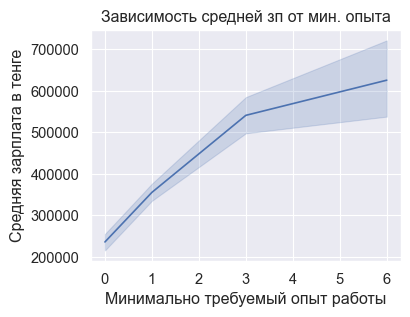

In [27]:
plt.figure(figsize=(4, 3))
sns.set_context('paper', font_scale=1.2)

sns.lineplot(x='exp_min', y='salary_mean', data=notna_mean_salary)

plt.xlabel('Минимально требуемый опыт работы')
plt.ylabel('Средняя зарплата в тенге')
plt.title('Зависимость средней зп от мин. опыта')

**Результат:**<br>
График демонстрирует четкую и сильную положительную корреляцию:
1. **Начальный уровень (нет опыта)**: Средняя зарплата составляет около **230-250 тыс. тенге**. Это базовый уровень для стажеров и младших специалистов.
2. **Рост до Middle (1-3 года)**: Наблюдается наиболее резкий скачок. к **3 годам** требуемого опыта средняя зарплата возрастает до **550 тыс. тенге**, что более чем вдвое превышает начальный уровень.
3. **Уровень Senior (3-6 лет)**: Рост продолжается, но становится более плавным. к **6 годам** опыта средняя зарплата достигает **620 тыс. тенге** с потенциалом до **700 тыс. тенге**.

<br>**Вывод:**<br>
Опыт является критически важным фактором в IT-инлустрии Казахстана. Каждый дополнительный год опыта, особенно на начальных этапах, приводит к значительному увеличению средней предлагаемой зарплаты. Наибольшая ценность опыта наблюдается при переходе от *Junior* к *Middle* (0 до 3 лет).

---

**Цель:**<br>
Проанализировать и визуализировать взаимосвязь между городом, минимальным требуемым опытом и средней предлагаемой зарплатой с помощью диаграммы размаха. Диаграмма покажет медианную зарплату, квартили и выборсы каждого сочетания города и уровня опыта, позволяя точно сравнить "цену" опыта в разных регионах.

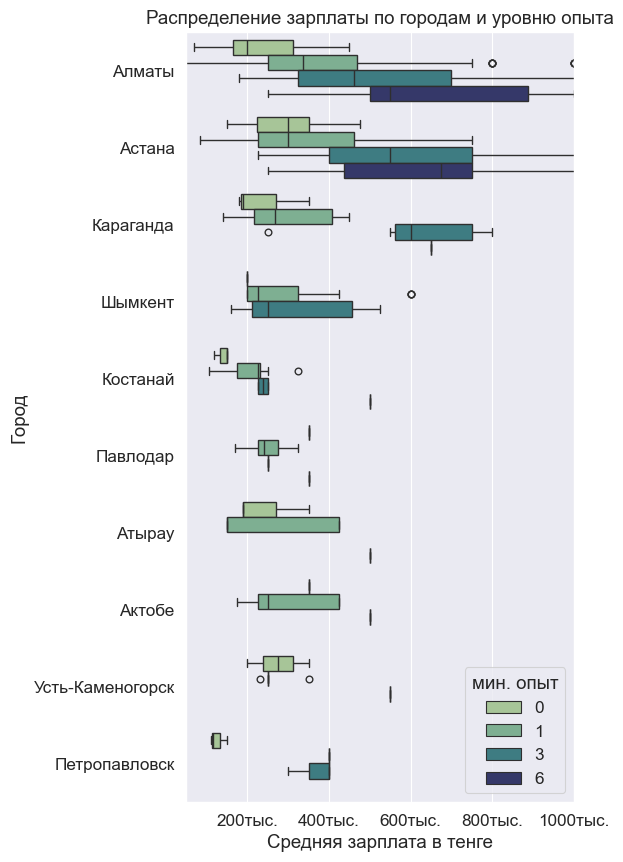

In [28]:
plt.figure(figsize=(5, 10))
sns.set_context('paper', font_scale=1.4)

sns.boxplot(y='city', x='salary_mean', order=top_10_city, palette='crest', hue='exp_min', data=notna_mean_salary).legend(title='мин. опыт')

plt.xlim(50000, df["salary_mean"].quantile(0.95))
plt.ylabel('Город')
plt.xlabel('Средняя зарплата в тенге')
plt.title('Распределение зарплаты по городам и уровню опыта')
formatter()

**Результат:**<br>
Диаграмма подтверждает и углубляет выводы, полученные ранее, демонстрируя явную стратификацию:
1. **Лидеры по всем параметрам (Алматы и Астана)**:
   - Имеют самый широкий диапазон зарплат и самые высокие медианные значения для всех уровней опыта.
   - Уровень опыта **6 лет** предлагает медианную зарплату, значительно превышающую **800 тыс. тенге**, что является максимумом.
2. **Региональные центры (Караганда, Атырау, Актобе, Шымкент)**:
   - Ниже зарплаты, но зависимость от опыта сохраняется, хоть и не такая заметная.
   - К примеру, медианная зарплата в **Караганде** для **6 лет** опыта (около **600 тыс. тенге**) ниже, чем для **3 лет** опыта в **Алматы/Астане**.
   - При этом, в **Атырау** медианная зарплата для **1 года** опыта неожиданно высока (около **350-400 тыс. тенге**), что может указывать на специфический спроси на начальных специалистов в местных индустриях.
3. **Города с низким объемом вакансий (Костанай, Павлодар, Усть-Каменогорск, Петропавлск)**:
   - Узкое распределение зарплат, максимальные зарплаты (6 лет опыта) редко превышают **500 тыс. тенге**
   - Наблюдается либо малое количество предложений с опытом, либо их зарплаты не сильно отличаются от зарплат начально уровня.

<br>**Вывод:**<br>
Принципиальный вывод заключается в том, что для получения максимальной зарплаты в IT-сфере Казахстана критически важны два фактора:
- **Город:** Работа в **Алматы** или **Астане**
- **Опыт:** Наличие **3-6 лет** опыта.

## Ограничения

1. **Ограничение по периоду и полноте данных**
   - Датасет представлял вакансии только двух месяцев.
   - Неточные выводы сезонности без возможности анализа всего года.
2. **Ограничение по выборсам и диапазону зарплат**
   - Во всех зарплатных графиках использовался значение 95-го перцентиля для ограничении оси Х, отфильтровав очень высокие зарплаты которые искажали бы картину для большинство вакансий.
   - Все самые высокооплаиваемые позиции и максимальные предложения на рынке остались за рамками визуализации.
3. **Ограничение по группировке специальностей**
   - Топ-10 специальностей включают очень широкие категории, такие как "Программист" и "Разработчик".
   - Неизвестно, как общие категории распределены по конкретным технологиям.
   - Маскировка узкоспециализированных должностей за общими названиями, что снижает детализацию анализа.
4. **Ограничение по детализации опыта**
   - Опыт предоставлен только четыремя дискретнаыми уровнями: 0, 1, 3 и 6 лет.
   - Упрощает визуализацию, но скрывает возможные тонкие различия в зарплате для опыта, не входящего в эти категории.

## Выводы и Рекомендации
Обобщение ключевых трендов рынков труда IT в Казахстане и преложения практических рекомендации для соискателей и работодателей, основанные на выявленных закономерностях.
### Ключевые выводы
Анализ выявил сильную концентрацию и ярко выраженную зависимость зарплаты от географии и опыта:
1. **Доминирующие Центры Спроса и Зарплат:**
   - География: **Алматы** и **Астана** являются абсолютными лидерам по количеству вакансий и предлагают самый широкий и высокий диапазон зарплат.
   - Специальности: Наибольшее количество вакансий приходится на роли **Программиста** и, что интересно, на специалистов по **Найму**. Это указывает на активную фазу роста и расширения IT-компаний.
2. **Цена опыта:**
   - наблюдается сильная положительная корреляция между минимальным требуемым опытом и средней зарплатой. Самый значительный скачок в оплате наблюдается при переходе от **отсутсвия** опыта к **3 года** опыта.
3. **Максимальная Зарплата:**
   - Наиболее высокооплачиваемые позиции с опытом **6+ лет** сосредоточены почти исключительно в **Алматы** и **Астане**, где средние зарплаты для этого уровня превышают **800 тыс. тенге**.
4. **Наиболее "Дорогие" Роли:**
   - Позиции на **DevOps** и **Product Manager** вхоядт в число самый высокооплачиваемых, предлагая значительную плотность вакансий в диапазоне **400-600 тыс. тенге**
### Рекомендации для Соискателей
На основе анализа рынка, соискателям следует учитывать следующие стратегии:
| Уровень Опыта | Рекомендация | Ключевые Цели |
| :--- | :--- | :--- |
| **Начальный (0-1 год)** | Сосредоточиться на получении первого опыта в Алматы или Астане, поскольку эти города обеспечивают наибольший объем стартовых позиций. | Переход к средней зарплате **250–350 тыс. тенге**. |
| **Средний (1-3 года)** | Активно менять работу или вести переговоры о повышении. Именно в этом диапазоне достигается максимальный прирост в зарплате (более чем вдвое). | Достижение средней зарплаты **550 тыс. тенге**. |
| **Высокий (3+ года)** | Для достижения максимального уровня дохода (более **800 тыс. тенге**) необходимо работать в **Алматы** или **Астане**, поскольку региональные центры не предлагают такого же потолка зарплат. | Максимизация дохода и переход на уровень Senior/Lead. |
### Рекомендации для HR-специалистов и Работодателей
- **Приоритет Найму:** Сохранять высокий фокус на найме **HR-менеджеров** и **Рекрутеров**, так как спрос на эти позиции сопоставим со спросом на технических специалистов.
- **Географическая Стратегия:** Компании, расположенные вне Алматы и Астаны, должны предлагать конкурентные условия, так как их зарплатные диапазоны в среднем ниже, чем у лидеров рынка. Возможно, следует активнее развивать **удаленный формат** работы, чтобы конкурировать за специалистов из ведущих городов.
- **Удержание Талантов:** Самая большая ценность сосредоточена в специалистах с опытом **3-6 лет**. Необходимо разработать четкие программы удержания и роста, чтобы предотравтить их переход в другие компании, поскольку конкуренция за них очень высока.